# **UTS WEB MINING**

# 1. Analisa Clustering dengan menggunakan K-Mean




# **Data crawling**
Data crawling atau perayapan data adalah proses pengambilan data yang tersedia secara online untuk umum. Proses ini kemudian mengimpor informasi atau data yang telah ditemukan ke dalam file lokal di komputer Anda.

## Twint

Twint adalah sebuah tools yang digunakan untuk melakukan scrapping dari aplikasi twitter yang disetting secara khusus menggunakan bahasa pemrograman Python. Twint dapat kita gunakan dan jalankan tanpa harus menggunakan API dari Twitter itu sendiri, dengan kapasitas scrapping data maksimalnya adalah 3200 tweet.

Bukan hanya digunakan pada tweet, twint juga bisa kita gunakan untuk melakukan scrapping pada user, followers, retweet dan sebagainya. Twint memanfaatkan operator pencarian twitter untuk memungkinkan proses penghapusan tweet dari user tertentu, memilih dan memilah informasi-informasi yang sensitif, termasuk email dan nomor telepon di dalamnya.

In [ ]:
!git clone --depth=1 https://github.com/twintproject/twint.git
%cd twint
!pip3 install . -r requirements.txt

fatal: destination path 'twint' already exists and is not an empty directory.
/content/twint/twint
ERROR: Directory '.' is not installable. Neither 'setup.py' nor 'pyproject.toml' found.


In [ ]:
pip install nest-asyncio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install aiohttp==3.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nest_asyncio
nest_asyncio.apply() #digunakan sekali untuk mengaktifkan tindakan serentak dalam notebook jupyter.
import twint #untuk import twint
c = twint.Config()
c.Search = 'tragedi Kanjuruhan'
c.Pandas = True
c.Limit = 70
twint.run.Search(c)

1580010458760630272 2022-10-12 01:40:23 +0000 <cak_sugenk> @JazzyWinterBear Sejawat yang sedang menempuh pendidikan dokter spesialis mata dan departemennya sedang menyiapkan case series untuk pasien-pasien tragedi Kanjuruhan.  Lebih kredibel dan scientific
1580010269236871168 2022-10-12 01:39:38 +0000 <Komunitas_Bonek> Persebaya Kembali Latihan Pasca Tragedi Kanjuruhan, Aji Santoso: Fokus Lagi -  https://t.co/hoQOubN7bI
1580010149762039811 2022-10-12 01:39:09 +0000 <e100ss> Dua Tersangka Tragedi Kanjuruhan Diperiksa 12 Jam, tapi Tidak Ditahan  https://t.co/NwBoa6Q9Xz
1580010092048822272 2022-10-12 01:38:55 +0000 <panjolssaja> @GunRomli Bukannya isu utk nutupi tragedi Kanjuruhan mas
1580010014311583744 2022-10-12 01:38:37 +0000 <sanjaya771568> FIFA disebut tak akan meninggalkan PSSI setelah Tragedi Kanjuruhan yang menewaskan 131 orang. Induk federasi sepakbola sedunia itu akan terus mendampingi.
1580009881935175680 2022-10-12 01:38:05 +0000 <BatamPos> Tersangka Tragedi Kanjuruhan Berdal

In [ ]:
Tweets_dfs = twint.storage.panda.Tweets_df
Tweets_dfs["tweet"]

0                                                                                                               @JazzyWinterBear Sejawat yang sedang menempuh pendidikan dokter spesialis mata dan departemennya sedang menyiapkan case series untuk pasien-pasien tragedi Kanjuruhan.  Lebih kredibel dan scientific
1                                                                                                                                                                                                              Persebaya Kembali Latihan Pasca Tragedi Kanjuruhan, Aji Santoso: Fokus Lagi -  https://t.co/hoQOubN7bI
2                                                                                                                                                                                                                      Dua Tersangka Tragedi Kanjuruhan Diperiksa 12 Jam, tapi Tidak Ditahan  https://t.co/NwBoa6Q9Xz
3                                                                     

In [ ]:
Tweets_dfs["tweet"].to_csv("Kanjuruhan.csv")

# **Mengambil Data**

Proses ini digunakan untuk mengambil 100 data tweet yang telah disimpan dalam github dengan format .csv



In [ ]:
#install library pandas
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#install library numpy
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd 
import numpy as np


In [ ]:
#install library sastrawi
!pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#install library swifter
!pip install swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# *Case Folding**

Tahap untuk merubah teks yang memiliki huruf kapital menjadi huruf kecil

In [ ]:
Tweets_dfs["tweet"] = Tweets_dfs["tweet"].str.lower()


Tweets_dfs["tweet"]

0                                                                                                               @jazzywinterbear sejawat yang sedang menempuh pendidikan dokter spesialis mata dan departemennya sedang menyiapkan case series untuk pasien-pasien tragedi kanjuruhan.  lebih kredibel dan scientific
1                                                                                                                                                                                                              persebaya kembali latihan pasca tragedi kanjuruhan, aji santoso: fokus lagi -  https://t.co/hoqoubn7bi
2                                                                                                                                                                                                                      dua tersangka tragedi kanjuruhan diperiksa 12 jam, tapi tidak ditahan  https://t.co/nwboa6q9xz
3                                                                     

In [ ]:
#install library nltk
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Menghapus Karakter Spesial

In [ ]:
import string 
import re #regex library
# import word_tokenize & FreqDist from NLTK

from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

# ------ Tokenizing ---------

def remove_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\'," ").replace('\\f'," ").replace('\\r'," ")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
                
Tweets_dfs["tweet"] = Tweets_dfs["tweet"].apply(remove_special)
Tweets_dfs["tweet"]


0                                                                                                                     sejawat yang sedang menempuh pendidikan dokter spesialis mata dan departemennya sedang menyiapkan case series untuk pasien-pasien tragedi kanjuruhan. lebih kredibel dan scientific
1                                                                                                                                                                                                                           persebaya kembali latihan pasca tragedi kanjuruhan, aji santoso: fokus lagi -
2                                                                                                                                                                                                                                   dua tersangka tragedi kanjuruhan diperiksa 12 jam, tapi tidak ditahan
3                                                                                                         

## Menghapus Angka

In [ ]:

#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

Tweets_dfs["tweet"] = Tweets_dfs["tweet"].apply(remove_number)
Tweets_dfs["tweet"]

0                                                                                                                     sejawat yang sedang menempuh pendidikan dokter spesialis mata dan departemennya sedang menyiapkan case series untuk pasien-pasien tragedi kanjuruhan. lebih kredibel dan scientific
1                                                                                                                                                                                                                           persebaya kembali latihan pasca tragedi kanjuruhan, aji santoso: fokus lagi -
2                                                                                                                                                                                                                                     dua tersangka tragedi kanjuruhan diperiksa  jam, tapi tidak ditahan
3                                                                                                         

## Menghapus Tanda Baca

In [ ]:

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

Tweets_dfs["tweet"] = Tweets_dfs["tweet"].apply(remove_punctuation)
Tweets_dfs["tweet"]

0                                                                                                        sejawat yang sedang menempuh pendidikan dokter spesialis mata dan departemennya sedang menyiapkan case series untuk pasienpasien tragedi kanjuruhan lebih kredibel dan scientific
1                                                                                                                                                                                                               persebaya kembali latihan pasca tragedi kanjuruhan aji santoso fokus lagi 
2                                                                                                                                                                                                                       dua tersangka tragedi kanjuruhan diperiksa  jam tapi tidak ditahan
3                                                                                                                                                      

## Menghapus Spasi


In [ ]:

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

Tweets_dfs["tweet"] = Tweets_dfs["tweet"].apply(remove_whitespace_LT)


#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

Tweets_dfs["tweet"] = Tweets_dfs["tweet"].apply(remove_whitespace_multiple)
Tweets_dfs["tweet"]

0                                                                                                        sejawat yang sedang menempuh pendidikan dokter spesialis mata dan departemennya sedang menyiapkan case series untuk pasienpasien tragedi kanjuruhan lebih kredibel dan scientific
1                                                                                                                                                                                                                persebaya kembali latihan pasca tragedi kanjuruhan aji santoso fokus lagi
2                                                                                                                                                                                                                        dua tersangka tragedi kanjuruhan diperiksa jam tapi tidak ditahan
3                                                                                                                                                      

## Menghapus huruf 

In [ ]:

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", " ", text)

Tweets_dfs["tweet"] = Tweets_dfs["tweet"].apply(remove_singl_char)
Tweets_dfs["tweet"]

0                                                                                                        sejawat yang sedang menempuh pendidikan dokter spesialis mata dan departemennya sedang menyiapkan case series untuk pasienpasien tragedi kanjuruhan lebih kredibel dan scientific
1                                                                                                                                                                                                                persebaya kembali latihan pasca tragedi kanjuruhan aji santoso fokus lagi
2                                                                                                                                                                                                                        dua tersangka tragedi kanjuruhan diperiksa jam tapi tidak ditahan
3                                                                                                                                                      

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# **Tokenizing**

Tokenizing adalah proses pemisahan teks menjadi potongan-potongan yang disebut sebagai token untuk kemudian di analisa. Kata, angka, simbol, tanda baca dan entitas penting lainnya dapat dianggap sebagai token

In [ ]:

# NLTK word Tokenize 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

Tweets_dfs["tweet"] = Tweets_dfs["tweet"].apply(word_tokenize_wrapper)
Tweets_dfs["tweet"]

0                                                                                                                        [sejawat, yang, sedang, menempuh, pendidikan, dokter, spesialis, mata, dan, departemennya, sedang, menyiapkan, case, series, untuk, pasienpasien, tragedi, kanjuruhan, lebih, kredibel, dan, scientific]
1                                                                                                                                                                                                                                            [persebaya, kembali, latihan, pasca, tragedi, kanjuruhan, aji, santoso, fokus, lagi]
2                                                                                                                                                                                                                                                     [dua, tersangka, tragedi, kanjuruhan, diperiksa, jam, tapi, tidak, ditahan]
3                                 

# **Filtering(Stopwords Removal)**
Proses untuk menghapus kata hubung atau kata yang tidak memiliki makna


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:

list_stopwords = stopwords.words('indonesian')

#Menghapus Stopword dari list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

Tweets_dfs["tweet"] = Tweets_dfs["tweet"].apply(stopwords_removal)

Tweets_dfs["tweet"]

0                                                                                                                                    [sejawat, menempuh, pendidikan, dokter, spesialis, mata, departemennya, case, series, pasienpasien, tragedi, kanjuruhan, kredibel, scientific]
1                                                                                                                                                                                                             [persebaya, latihan, pasca, tragedi, kanjuruhan, aji, santoso, fokus]
2                                                                                                                                                                                                                         [tersangka, tragedi, kanjuruhan, diperiksa, jam, ditahan]
3                                                                                                                                                                           

# **Stemming**
Data training hasil dari filtering akan dilakukan pengecekan atau pencarian kata-kata yang sesuai dengan kamus umum. Apabila data training hasil filtering sesuai dengan kamus umum maka kata akan dikeluarkan sementara, karena sudah dianggap sebagai kata dasar. Apabila masih terdapat kata yang tidak termasuk dalam kata dasar maka tahap selanjutnya adalah menghapus inflection suffixes yang merupakan akhiran pertama. Kata yang memiliki akhiran partticles seperti “-pun”, “-kah”, “-tah”, “- lah” dan akhiran possessive pronoun seperti “-mu”, “-ku” dan “-nya” dihilangkan. Setelah dilakukan proses case folding, tokenezing, dan filtering, proses selanjutnya yaitu stemming. Stemming yang digunakan pada penelitian ini menggunakan algoritma Enhanced Confix Stipping Stemmer, terdiri dari beberapa langkah: Data training hasil dari filtering akan dilakukan pengecekan atau pencarian kata-kata yang sesuai dengan kamus umum. Apabila data training hasil filtering sesuai dengan kamus umum maka kata akan dikeluarkan sementara, karena sudah dianggap sebagai kata dasar. Apabila masih terdapat kata yang tidak termasuk dalam kata dasar maka tahap selanjutnya adalah menghapus inflection suffixes yang merupakan akhiran pertama. Kata yang memiliki akhiran partticles seperti “-pun”, “-kah”, “-tah”, “- lah” dan akhiran possessive pronoun seperti “-mu”, “-ku” dan “-nya” dihilangkan.

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in Tweets_dfs["tweet"]:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

Tweets_dfs["tweet"] = Tweets_dfs["tweet"].swifter.apply(get_stemmed_term)
Tweets_dfs["tweet"]

456
------------------------
sejawat : jawat
menempuh : tempuh
pendidikan : didik
dokter : dokter
spesialis : spesialis
mata : mata
departemennya : departemen
case : case
series : series
pasienpasien : pasienpasien
tragedi : tragedi
kanjuruhan : kanjuruhan
kredibel : kredibel
scientific : scientific
persebaya : baya
latihan : latih
pasca : pasca
aji : aji
santoso : santoso
fokus : fokus
tersangka : sangka
diperiksa : periksa
jam : jam
ditahan : tahan
isu : isu
utk : utk
nutupi : nutupi
mas : mas
fifa : fifa
meninggalkan : tinggal
pssi : pssi
menewaskan : tewas
orang : orang
induk : induk
federasi : federasi
sepakbola : sepakbola
sedunia : dunia
mendampingi : damping
berdalih : dalih
permintaan : minta
penambahantiket : penambahantiket
berduka : duka
blink : blink
indonesia : indonesia
penggalangan : galang
dana : dana
korban : korban
keluarga : keluarga
malang : malang
donasi : donasi
link : link
kapolres : kapolres
akbp : akbp
putu : putu
kholis : kholis
aryana : aryana
duduk : duduk


Pandas Apply:   0%|          | 0/80 [00:00<?, ?it/s]

0                                                                                                                                 [jawat, tempuh, didik, dokter, spesialis, mata, departemen, case, series, pasienpasien, tragedi, kanjuruhan, kredibel, scientific]
1                                                                                                                                                                                                     [baya, latih, pasca, tragedi, kanjuruhan, aji, santoso, fokus]
2                                                                                                                                                                                                                 [sangka, tragedi, kanjuruhan, periksa, jam, tahan]
3                                                                                                                                                                                                                       [

##Menyimpan Hasil Tahap Preprocessing ke file .csv

In [ ]:

Tweets_dfs.to_csv('preproKajuruhan.csv')

# **TF**

TF(Term Frequency) : Istilah frekuensi kata dalam dokumen. Ada beberapa cara untuk menghitung frekuensi ini, dengan cara yang paling sederhana adalah dengan menghitung jumlah kata yang muncul dalam dokumen. Lalu, ada cara untuk menyesuaikan frekuensi, berdasarkan panjang dokumen, atau dengan frekuensi mentah kata yang paling sering muncul dalam dokumen.

In [ ]:

from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer
#Membuat Dataframe
dataTextPre = pd.read_csv('preproKajuruhan.csv')
vectorizer = CountVectorizer(min_df=1)
bag = vectorizer.fit_transform(dataTextPre["tweet"])


In [ ]:
matrik_vsm=bag.toarray()
#print(matrik_vsm)
matrik_vsm.shape

(80, 434)

In [ ]:
matrik_vsm[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
a=vectorizer.get_feature_names()

In [ ]:
print(len(matrik_vsm[:,1]))
#dfb =pd.DataFrame(data=matrik_vsm,index=df,columns=[a])
dataTF =pd.DataFrame(data=matrik_vsm,index=list(range(1, len(matrik_vsm[:,1])+1, )),columns=[a])
dataTF

80


,ade,agama,air,ajak,ajar,aji,akbp,aksi,aktor,aku,akun,al,alergi,alvin,amal,aman,ambil,amp,anak,anggota,anies,antisipasi,apresiasi,arema,aremania,armando,aryana,badai,bahaya,baik,balas,bambang,banda,bandung,bangga,bangka,bantai,bantu,bantuanpengobatan,banya,baswedan,batas,baya,belitung,bentuk,berani,berat,bersikukuh,bertambahpada,bijak,bikin,bilang,blink,bola,bonek,bri,bukti,cari,case,casenya,cc,cebong,cepat,contingency,curiga,dalam,dalih,dampak,damping,dana,datang,deklarasi,departemen,desak,destruktif,detail,dg,didik,digital,dikanjuruhan,dirmanto,doa,dokter,donasi,dpr,duduk,duga,duka,dukung,dunia,effect,empati,erick,evaendy,faiz,fakta,fans,fc,federasi,ferdy,ferry,fifa,fikry,fine,fokus,gabung,gak,galang,games,ganti,gantiin,gas,gelar,gempa,geopolitik,gerak,gianni,golong,gratis,guna,gw,hadap,hadian,hadir,hak,ham,hasil,hayoloh,henti,humas,identitas,igk,iii,in,independen,indonesia,indosiar,induk,industri,infantino,innalillahi,instruksi,intelektual,internasional,investigas,investigasi,irjen,irwandi,isu,jago,jajar,jalan,jam,jasa,jateng,jatim,jawa,jawat,jelata,jenguk,jiwa,joko,jokowi,julio,kabid,kabupaten,kacau,kaesang,kait,kaji,kak,kakanwil,kali,kan,kanjuruhan,kantong,kantor,kapolres,kawan,kayak,kedaluwarsa,kedaluwasra,keluarga,keluh,kemenko,kemenkumham,ken,kenal,kesan,ketua,kholis,klaim,klo,klub,kombes,komdis,komersialisasi,komisi,komnas,komplikasi,konstruktif,korban,korbankata,kredibel,kredibilitas,kritisi,krn,kuat,kunci,kunjung,laku,langgar,langkah,langsung,lanjut,lapor,lari,latih,lempar,lengkap,lg,lib,libat,liga,lim,lindung,link,lobi,lpsk,luis,luka,lukita,maaf,mahfud,main,malang,manajer,mania,manila,mantan,mas,massal,masuk,mata,mati,md,menko,menpora,menystakan,milik,militer,milla,minggu,minta,misteri,moga,mu,mukrianto,nama,nanya,nasional,naswa,negara,neira,nonton,not,nutupi,nyata,nyawa,obat,odgj,olahraga,orang,paa,pagi,pangarep,panggil,panjang,panjat,panpel,papan,pasca,pasienpasien,paska,peace,peduli,penambahantiket,penasaran,pengaruh,penuh,penyebabutama,periksa,perilaku,perintah,persib,persis,piala,pidana,pilih,pintu,plan,planet,pmk,polda,polhukam,polisi,polresta,power,presiden,pss,pssi,pt,puji,pulang,pulau,putra,putu,rahmat,rakyat,ratus,rekan,rencana,renggut,resesi,rest,ri,ribero,rugi,rumah,rusa,sabtu,salut,sambang,sambo,sampeyan,sangka,sanksi,santoso,santun,saran,sat,scientific,sea,selamat,selasa,selasela,selenggara,sembako,semenjak,sengaja,sepak,sepakbola,seret,series,seto,siang,sianida,siap,siar,sibuk,sikap,simpuh,simpul,sindir,sipil,sisa,sleman,sobat,sok,solo,sop,sorot,spesialis,stadion,suara,sujud,suku,suporter,supporter,swiss,tahan,tambah,tanding,tanggung,teduh,tegak,tegas,tekat,tembak,tempuh,temu,terang,terangterangan,terburuburu,terima,tetap,tewas,tgipf,thohir,tiket,tim,timnas,timur,tinggal,tinjau,tragedi,tragedikanjuruhan,tri,tuan,tuju,tum,tunang,tuntas,turun,tutup,twitternya,ulang,ungkap,urung,usut,utk,video,viva,wajib,warga,warganet,wib,widodo,xixix,yanh,yg,youtube,yuspahruddin,zainudin
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

 # 2. Peringkasan Berita 

# KMeans

K-Means Clustering adalah suatu metode penganalisaan data atau metode Data Mining yang melakukan proses pemodelan unssupervised learning dan menggunakan metode yang mengelompokan data berbagai partisi.

K Means Clustering memiliki objective yaitu meminimalisasi object function yang telah di atur pada proses clasterisasi. Dengan cara minimalisasi variasi antar 1 cluster dengan maksimalisasi variasi dengan data di cluster lainnya.

In [ ]:
from sklearn.cluster import KMeans

kmeans =KMeans(n_clusters=3)
kmeans=kmeans.fit(dataTF)
prediksi=kmeans.predict(dataTF)
centroids = kmeans.cluster_centers_

data=pd.DataFrame(prediksi,columns=["Cluster"])
data


,Cluster
0,1
1,1
2,1
3,1
4,1
5,1
6,0
7,1
8,1
9,1


# **MERINGKAS DOKUMEN**

In [ ]:
%%capture
!pip install scrapy
!pip install pandas
!pip install scikit-learn
!pip install --user -U nltk

!pip install scipy
!pip install networkx


In [ ]:
!rm -rf kompas_scrape.py hasil.json && sleep 1

In [ ]:
%%writefile -a kompas_scrape.py
import string
import scrapy
from scrapy import Request

#@markdown ---
#@markdown ### Masukkan url artikel kompas.com :
artikel_url = "https://tekno.kompas.com/read/2022/10/10/14000087/kisah-aa-korban-pig-butchering-asal-indonesia-yang-rugi-rp-500-an-juta" #@param {type:"string"}
artikel_url = artikel_url+"?page=all"
#@markdown ---

class ptaUTM(scrapy.Spider):
    name = "Kompas"
    start_urls = [
      artikel_url
      ]


    def parse(self, response):
        a = ""
        for paragraf in response.xpath('//div[contains(@class,"clearfix")]/p/text()').getall():
          a = a+" "+str(paragraf)
        item = {
            'judul' : response.xpath('//h1[contains(@class,"read__title")]/text()').get(),
            'konten' : a
        }

        yield item

Writing kompas_scrape.py


## **Menjalankan Script Scrapy**
Setelah sebelumnya kita menulis script konfigurasi scrapy, selanjutnya kita akan menjalankan script tersebut dengan perintah "scrapy runspider" yang diikuti dengan nama berkas script dan dan nama berkas output untuk menyimpan hasilnya.

In [ ]:
%%capture
!scrapy runspider kompas_scrape.py -O hasil.json && sleep 2

## **Import Hasil**
Setelah perintah sebelumnya berhasil dijalankan, selanjutnya kita akan melakukan import isi berkas hasil scrape sebelumnya kedalam Pandas DataFrame.

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None
pd.options.display.max_colwidth = None
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df_scrape = pd.read_json('hasil.json')
df_scrape

judul  \
0  Kisah AA, Korban Pig Butchering Asal Indonesia yang Rugi Rp 500-an Juta   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

df_pisahkalimat = df_scrape.copy()
df_pisahkalimat ["konten"][0] = sent_tokenize(df_pisahkalimat["konten"][0])

df_pisahkalimat = pd.DataFrame(df_pisahkalimat["konten"][0], columns=["kalimat"])
df_pisahkalimat

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,kalimat
0,"- Akhir bulan Agustus, tepatnya tanggal 20 tahun 2022, menjadi hari yang tak terlupakan oleh seorang perempuan asal Pengalengan, Jawa Barat."
1,"Perempuan berusia 35 tahun itu ingin namanya disamarkan sebagai ""AA""."
2,Hari itu menjadi awal dari malapetaka yang tak pernah terbayangkan sebelumnya oleh AA.
3,"Di hari itu, AA ingat betul ada seorang pria yang mengaku berasal dari Korea Selatan yang mengiriminya Instagram (DM IG)."
4,"""Ada orang nge-DM Instagram aku."
5,Dia mengajak kenalan.
6,Dia komentar di salah satu foto di IG aku.
7,Dia fotonya di mana.
8,"Dia juga minta rekomendasi tempat-tempat yang ada di Indonesia untuk didatangi saat dia ke Indonesia,"" kata AA membuka kisahnya saat dihubungi tempo hari."
9,Ia pun menanggapi ajakan kenalan seorang pria yang mengaku berasal dari Korea Selatan itu dengan terbuka.


In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

df_pisahkalimat = df_scrape.copy()
df_pisahkalimat ["konten"][0] = sent_tokenize(df_pisahkalimat["konten"][0])

df_pisahkalimat = pd.DataFrame(df_pisahkalimat["konten"][0], columns=["kalimat"])
df_pisahkalimat

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,kalimat
0,"- Akhir bulan Agustus, tepatnya tanggal 20 tahun 2022, menjadi hari yang tak terlupakan oleh seorang perempuan asal Pengalengan, Jawa Barat."
1,"Perempuan berusia 35 tahun itu ingin namanya disamarkan sebagai ""AA""."
2,Hari itu menjadi awal dari malapetaka yang tak pernah terbayangkan sebelumnya oleh AA.
3,"Di hari itu, AA ingat betul ada seorang pria yang mengaku berasal dari Korea Selatan yang mengiriminya Instagram (DM IG)."
4,"""Ada orang nge-DM Instagram aku."
5,Dia mengajak kenalan.
6,Dia komentar di salah satu foto di IG aku.
7,Dia fotonya di mana.
8,"Dia juga minta rekomendasi tempat-tempat yang ada di Indonesia untuk didatangi saat dia ke Indonesia,"" kata AA membuka kisahnya saat dihubungi tempo hari."
9,Ia pun menanggapi ajakan kenalan seorang pria yang mengaku berasal dari Korea Selatan itu dengan terbuka.


### Case Folding
Case folding merupakan tahap text preprocessing yang berguna untuk :


*   Mengubah huruf kapital menjadi huruf kecil
*   Mengapus tanda baca
*   Menghapus angka
*   Menghapus karakter kosong




In [ ]:
import string
df_casefolding = df_pisahkalimat.copy()
#mengubah menjadi huruf kecil
df_casefolding['kalimat'] = df_casefolding['kalimat'].str.lower()

#menghapus tanda baca
tanda_baca = string.punctuation
tanda_baca = tanda_baca+"–"
for char in tanda_baca:
    df_casefolding['kalimat'] = df_casefolding['kalimat'].replace(r'[\%s]'%char," ", regex=True)

#menghapus angka
df_casefolding['kalimat'] = df_casefolding['kalimat'].replace(r'\d+',' ', regex=True)

#menghapus karakter kosong
df_casefolding['kalimat'] = df_casefolding['kalimat'].replace(r'\s+',' ', regex=True)
df_casefolding.head(2)

,kalimat
0,akhir bulan agustus tepatnya tanggal tahun menjadi hari yang tak terlupakan oleh seorang perempuan asal pengalengan jawa barat
1,perempuan berusia tahun itu ingin namanya disamarkan sebagai aa


### Vectorization

Dalam Machine Learning, vektorisasi adalah langkah dalam ekstraksi fitur. Idenya adalah untuk mendapatkan beberapa fitur berbeda dari teks untuk model untuk dilatih, dengan mengubah teks menjadi vektor numerik.



In [116]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv_matrix = cv.fit_transform(df_casefolding['kalimat'])

In [117]:
print ("Banyaknya kosa kata = ", len((cv.get_feature_names_out())))

Banyaknya kosa kata =  770


In [118]:
print ("kosa kata = ", (cv.get_feature_names_out()))

kosa kata =  ['aa' 'abal' 'ada' 'adalah' 'admin' 'agak' 'agar' 'agustus' 'aja' 'ajakan'
 'akan' 'akhir' 'akhirnya' 'akibat' 'aku' 'akun' 'akunnya' 'alhamdulillah'
 'alias' 'an' 'anak' 'ancaman' 'apa' 'aplikasi' 'arahan' 'as' 'asal'
 'aset' 'asetnya' 'asing' 'atas' 'atau' 'aturan' 'awal' 'awalnya' 'babi'
 'babinya' 'badan' 'bagai' 'bagi' 'baginya' 'bagus' 'bahasan' 'bahaya'
 'bahkan' 'bahwa' 'baik' 'bak' 'bakal' 'balik' 'banget' 'bank' 'banyak'
 'barat' 'baru' 'bayar' 'beberapa' 'bekas' 'beluk' 'belum' 'benak' 'bener'
 'berasal' 'berat' 'berbagai' 'berbaik' 'berbeda' 'beresin' 'bergetar'
 'berhutan' 'berinvestasi' 'berisi' 'berkaca' 'berkenalan' 'berlalu'
 'berlanjut' 'bermula' 'bernama' 'berniat' 'berpikir' 'bertukar' 'berubah'
 'berujung' 'berusia' 'besar' 'besoknya' 'betul' 'biar' 'biasa' 'bila'
 'bilang' 'binance' 'biro' 'bisa' 'bitcoin' 'bitmart' 'bitmartch'
 'bodohnya' 'bodong' 'bolak' 'bolong' 'bpkb' 'bualan' 'buat' 'bubur'
 'bujuk' 'buka' 'bukan' 'bukannya' 'bukti' 'bulan' 'bung

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
normal_matrix = TfidfTransformer().fit_transform(cv_matrix)
print(normal_matrix.toarray())
print(normal_matrix.T.toarray)

[[0.         0.         0.         ... 0.         0.10950827 0.        ]
 [0.11830538 0.         0.         ... 0.         0.         0.        ]
 [0.10798503 0.         0.         ... 0.         0.14962933 0.        ]
 ...
 [0.         0.         0.         ... 0.         0.20108317 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
<bound method _cs_matrix.toarray of <770x157 sparse matrix of type '<class 'numpy.float64'>'
	with 2156 stored elements in Compressed Sparse Column format>>


### Cosine Similarity






In [ ]:
import numpy as np
vektorkalimat=normal_matrix.toarray()
A=vektorkalimat[0]
B=vektorkalimat[1]
dot = np.dot(A, B)
norma = np.linalg.norm(A)
normb = np.linalg.norm(A)
cos = dot / (norma * normb)
cos

0.18073789423716918

## Membangun Graph

Graph merupakan sekumpulan objek terstruktur di mana beberapa pasangan objek mempunyai hubungan ataupun keterkaitan tertentu. Graph disini digunakan untuk melihat seberapa banyak hubungan antara kalimat satu dengan lainnya.

In [ ]:
res_graph = normal_matrix * normal_matrix.T
print(res_graph)

  (0, 11)	0.06864548319065603
  (0, 81)	0.037418285784025666
  (0, 76)	0.04071848967897242
  (0, 53)	0.06002606149069709
  (0, 37)	0.09627396328434606
  (0, 128)	0.12646462157972418
  (0, 118)	0.07438843616876506
  (0, 74)	0.04446015455811875
  (0, 71)	0.04870926162113624
  (0, 1)	0.18073789423716918
  (0, 72)	0.04545831970163053
  (0, 50)	0.05191821284169574
  (0, 38)	0.05218332721080278
  (0, 27)	0.09279844795407408
  (0, 10)	0.036016039292567775
  (0, 84)	0.07296195480021585
  (0, 154)	0.02202027059288484
  (0, 153)	0.013131180375496343
  (0, 151)	0.012962405975118557
  (0, 137)	0.020908940203412073
  (0, 134)	0.01610741791072967
  (0, 131)	0.049974805095184295
  (0, 129)	0.01575571734269581
  (0, 127)	0.014568986899866514
  (0, 124)	0.012356661630126439
  :	:
  (156, 154)	0.024531139056461294
  (156, 149)	0.026762005476726157
  (156, 146)	0.04025003978302634
  (156, 141)	0.02898713049871523
  (156, 134)	0.03588814287652939
  (156, 132)	0.023035133204179065
  (156, 125)	0.0345018371

In [ ]:
import networkx as nx
nx_graph = nx.from_scipy_sparse_matrix(res_graph)

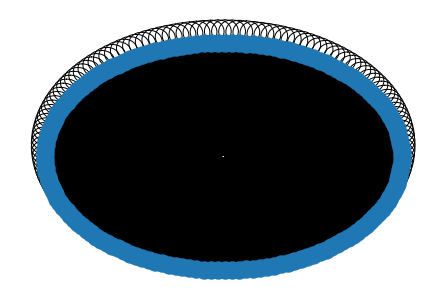

In [ ]:
nx.draw_circular(nx_graph)

## Pagerank

PageRank adalah algoritma analisis tautan dan memberikan bobot numerik untuk setiap elemen dari kumpulan dokumen yang ditautkan. 

Perhitungan PageRank memerlukan beberapa lintasan, yang disebut "iterasi", melalui koleksi untuk menyesuaikan perkiraan nilai PageRank agar lebih mencerminkan nilai teoretis yang sebenarnya.

In [ ]:
scores = nx.pagerank(nx_graph, alpha=0.88, max_iter=1000, )
scores

{0: 0.004022527604418738,
 1: 0.004378523855220126,
 2: 0.006502316385635435,
 3: 0.008378771565489456,
 4: 0.005658713468856442,
 5: 0.003582598129099818,
 6: 0.006448577644624775,
 7: 0.004544971366501575,
 8: 0.007208042983537187,
 9: 0.007210625694252375,
 10: 0.006903516303222797,
 11: 0.004538904670329138,
 12: 0.00521260416670403,
 13: 0.0038557804044014247,
 14: 0.006034072239472129,
 15: 0.003300334052564687,
 16: 0.0033359789765957993,
 17: 0.006076974580888981,
 18: 0.005676089625160358,
 19: 0.0066809857770361546,
 20: 0.004745841752761513,
 21: 0.003886160124751027,
 22: 0.003467068138415911,
 23: 0.008061233442991051,
 24: 0.0058206220537495345,
 25: 0.005475236546991203,
 26: 0.005557419609323934,
 27: 0.0062440148127649924,
 28: 0.007782188043269336,
 29: 0.006876926334802582,
 30: 0.0064717345711859066,
 31: 0.009155264694871178,
 32: 0.007218093675356601,
 33: 0.006534322012867129,
 34: 0.007235791359096929,
 35: 0.006255825755300375,
 36: 0.006363212300270066,
 37: 0

In [ ]:
#@title Persentase Ringkasan
#@markdown ---
#@markdown ### Tentukan persentase ringkasan : total kalimat:
persentase_ringkasan = 50 #@param {type:"slider", min:50, max:90, step:10}
#@markdown ---


Mencocokkan indeks kalimat asli dan kalimat hasil preprocessing

In [ ]:
top_sentence={sentence:scores[index] for index,sentence in enumerate(df_pisahkalimat["kalimat"].values)}

persentase = len(df_pisahkalimat["kalimat"])*persentase_ringkasan//100
print("Jumlah Kalimat pada Ringkasan : ",persentase)
top=dict(sorted(top_sentence.items(), key=lambda x: x[1], reverse=True)[:persentase])

Jumlah Kalimat pada Ringkasan :  78


### Hasil dan perbandingan

In [ ]:
ringkasan = ""
for sent in df_pisahkalimat["kalimat"].values:
    if sent in top.keys():
        ringkasan = ringkasan+" "+sent

#ringkasan
perbandingan = {'Teks asli' : df_scrape["konten"], 'Hasil Ringkasan' : [ringkasan]}
df_perbandingan = pd.DataFrame(perbandingan)
df_perbandingan

Teks asli  \
0    - Akhir bulan Agustus, tepatnya tanggal 20 tahun 2022, menjadi hari yang tak terlupakan oleh seorang perempuan asal Pengalengan, Jawa Barat. Perempuan berusia 35 tahun itu ingin namanya disamarkan sebagai "AA". Hari itu menjadi awal dari malapetaka yang tak pernah terbayangkan sebelumnya oleh AA. Di hari itu, AA ingat betul ada seorang pria yang mengaku berasal dari Korea Selatan yang mengiriminya   Instagram (DM IG). "Ada orang nge-DM Instagram aku. Dia mengajak kenalan. Dia komentar di salah satu foto di IG aku. Dia   fotonya di mana. Dia juga minta rekomendasi tempat-tempat yang ada di Indonesia untuk didatangi saat dia ke Indonesia," kata AA membuka kisahnya saat dihubungi   tempo hari. Ia pun menanggapi ajakan kenalan seorang pria yang mengaku berasal dari Korea Selatan itu dengan terbuka. Tak terbersit di benak AA bahwa percakapannya dengan orang asing di DM Instagram itu akan membawanya melalui masa-masa suram dalam hidupnya. Sebab, hanya dalam waktu kurang dari satu bulan sejak perkenalan pertama, hidup AA berubah 180 derajat. Pada September 2022, AA banyak terkoyak dan kehilangan. Terkoyak karena menderita secara psikis sampai terpikir ingin bunuh diri. Kondisinya diperparah, karena AA juga kehilangan aset secara finansial hingga mencapai Rp 550 juta. "Sekarang sudah jauh lebih baik dibandingkan kemarin  . Cuman tetap belum 100 persen     mentalnya. Kalo   (kejadiaannya) masih gimana gitu," kata AA dengan suara bergetar, karena masih terasa berat bagi AA untuk menyampaikan kisah pilunya ini. AA adalah korban    , alias penipuan "potong babi" yang sedang menjadi perhatian biro investigasi federal AS, FBI saat ini. Pig Butchering merupakan salah satu skema penipuan dengan mekanisme manipulasi sosial yang sedang marak di dunia investasi aset uang kripto ( ). Istilah Pig Butchering   atau   ini berasal dari cara peternak menggemukkan babinya sebelum disembelih, agar menghasilkan daging yang banyak. Dalam kasus penipuan kripto, peternak digambarkan sebagai pelaku penipuan. Sementara babi merepresentasikan investor korban penipuan yang “menggemukkan” melalui janji-janji manis. Misalnya, dijanjikan bakal mendapat uang dan untung yang banyak dari investasi kripto yang dilakukan. Dalam proses penggemukan, investor bakal diajak menginvestasikan uang ke platform kripto bodong. Pada satu titik, kemungkinan ketika tujuan penipu tercapai, investor bakal disembelih alias ditipu habis-habisan karena uang yang diinvestasikan raib. Itulah yang terjadi kepada AA belum lama ini. Ia tak menduga bahwa percakapannya dengan pria asal Korea dari sebuah DM Instagram, kemudian berlanjut ke WhatsApp, bisa berujung kehilangan harta dalam jumlah besar. Di awal, AA dan Si Pria Korea itu kerap bertukar informasi seputar kegiatan sehari-hari, usaha yang sedang digeluti, dan informasi lainnya yang kerap menjadi topik bahasan ketika berkenalan dengan orang baru. Namun, sayangnya kecurigaan itu dikalahkan dengan sikap   AA dengan orang baru. Kecurigaannya semakin dikalahkan ketika AA melakukan   dengan Si Orang Korea. "Awalnya aku juga ragu,   aku   orangnya di Instagram sama dengan yang melakukan  ," kata AA. AA juga menceritakan bahwa orang Korea ini juga berbagai kisah pilu dengan dirinya. Lalu, pada satu titik, pria Korea tadi menceritakan kesuksesan dirinya dari investasi kripto. "Dia bilang, 'mau     investasi kripto biar kamu bisa   aku?". Siapa yang  , soalnya kalo lihat di Instagramnya, orang Korea ini   (punya gaya hidup mewah)," cerita AA. AA pun tertarik, namun memilih mengurungkan niatnya karena berkaca dari pengalaman suaminya yang pernah rugi akibat investasi kripto. Hari demi hari berlalu, pria Korea itu masih   mengajak AA untuk investasi kripto. Sampai satu titik, AA tak nyaman dan meminta orang Korea itu untuk tidak menghubunginya lagi. Namun, pria Korea itu masih ngotot dan malah membujuk AA untuk membuka platform investasi kripto bodong yang disiapkannya. "Coba deh, kamu buka dulu ini   bitmartch.net. Coba kamu   i